# 1) Demonstração da estabilidade local do sistema
Seja o sistema:

$$
\ddot y + (0.5 - y^2)\dot y + 4y = v
$$

No qual $y$ é o sinal de saída do sistema e $v$ é a entrada.

A estabilidade do sistema pode ser avaliada pelo método de Lyapunov. O primeiro passo para esse método é a localização de um ponto de equilíbrio na origem no plano de estados.

$$
x_1 = y \quad x_2 = \dot y \\
\begin{cases}
\dot x_1 = x_2 \\
\dot x_2 = v - (0.5 - x_1^2)x_2 - 4x_1
\end{cases}
$$

$$
\dot x_1 = \dot x_2 = v = 0 \\
\begin{cases}
\dot x_1 = 0  \implies x_2 = 0 \\
\dot x_2 = 0 - (0.5 - x_1^2) 0 - 4x_1 \implies x_1 =0
\end{cases}
$$

Existe um ponto de equilíbrio em $(x_1^*, x_2^*) = (0,0)$. Este ponto de equilíbrio precisa ser estável para poder determinar a região de estabilidade assintótica local.

A estabilidade pode ser avaliada determinando a estabilidade da linearidade do sistema próximo do ponto de equilíbrio, da seguinte maneira.

$$
A = \begin{bmatrix}
\frac{\partial\dot x_1}{\partial x_1} &
\frac{\partial\dot x_1}{\partial x_2} \\
\frac{\partial\dot x_2}{\partial x_1} &
\frac{\partial\dot x_2}{\partial x_2} \\
\end{bmatrix}_{(x_1^*, x_2^*)} \\
A = \begin{bmatrix}
0 &
1 \\
-4 - 2x_1^*x_2^* &
-(0.5 - x_1^{*2}) \\
\end{bmatrix} =
\begin{bmatrix}
0 &
1 \\
-4  &
-0.5 \\
\end{bmatrix}
$$

$$
|\lambda\mathcal{I} - A| =
\begin{bmatrix}
\lambda &
-1 \\
4  &
\lambda + 0.5 \\
\end{bmatrix} = \lambda^2 + 0.5\lambda + 4 \\
\lambda = -0.25 \pm j \sqrt{15.75}/2.
$$

Com isso podemos concluir que o sistema apresenta um sistema um ponto de equilíbrio (assintoticamente) estável na origem do sistema.

A região de estabilidade local do sistema é determinada pelo segunda parte do método de Lyapunov. Para isso, precisamos propor uma função pseudo-energia de Lyapunov que seja semidefinida positiva e que sua derivada seja semidefinida negativa.

$$
V(x_1, x_2) = \frac{\alpha}{2}x_1^2 + \frac{\beta}{2}x_2^2 > 0 \quad (x_1, x_2) \neq (0,0) \\
\dot V(x_1, x_2) = \alpha x_1\dot x_1 + \beta x_2\dot x_2 < 0 \quad (x_1, x_2) \neq (0,0) \\
\alpha x_1x_2 - \beta(0.5 - x_1^2)x_2^2 - 4\beta x_1x_2 < 0 \\
- \beta(0.5 - x_1^2)x_2^2 - (4\beta - \alpha)4x_1x_2 < 0
$$

Caso $\alpha = 4\beta = 4$:

$$
- (0.5 - x_1^2)x_2^2 < 0
$$

Caso $x_1^2 < 0.5$, temos que $|x_1|= \sqrt{0.5}$ e isso garante que a desigualdade sempre será verdadeira. A seguir determinamos os extremos da elipse que corresponde à região de estabilidade assintótica local.

$$
V(x_1, x_2) = 2 x_1^2 + \frac{x_2^2}{2} \\
V(\sqrt{0.5}, 0) = 2 \sqrt{0.5}^2 + \frac{0^2}{2} = 1 \\
V(0, x_2') = 1 = 2\ 0^2 + \frac{x_2^2}{2} \implies |x_2'| = \sqrt{2} \\
\therefore 2 x_1^2 + \frac{x_2^2}{2} < 1
$$

C:\Users\henrique.lozano\AppData\Local\Temp\ipykernel_10364\4190883195.py:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * (1 - 2 * x1**2))


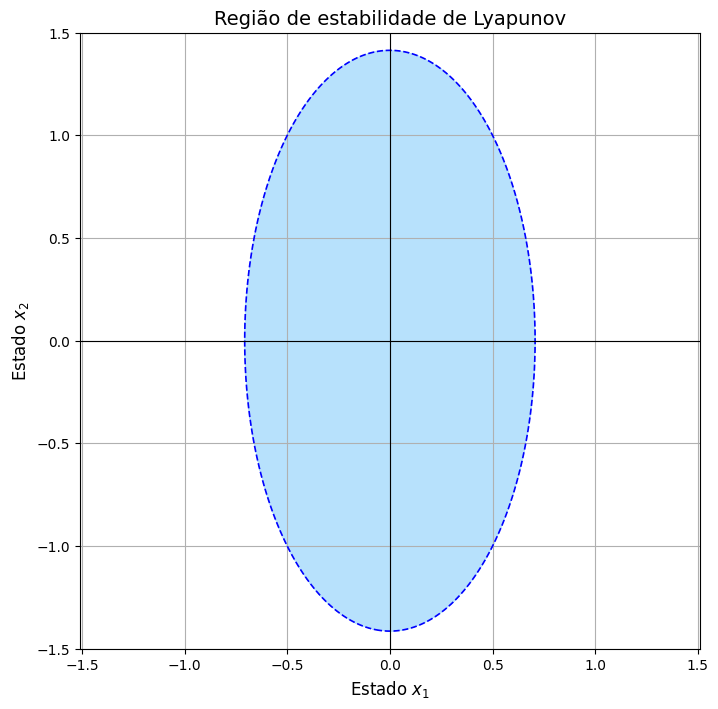

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for the boundary of the inequality
def inequality_boundary(x1):
    return np.sqrt(2 * (1 - 2 * x1**2))

# Generate x1 values within the possible range
x1_vals = np.linspace(-np.sqrt(0.5), np.sqrt(0.5), 400)

# Compute x2 values for the boundary
x2_vals = inequality_boundary(x1_vals)

# Set up the grid for plotting
x1_grid, x2_grid = np.meshgrid(np.linspace(-1.5, 1.5, 400), np.linspace(-1.5, 1.5, 400))
inequality = 2 * x1_grid**2 + 0.5 * x2_grid**2

# Plotting the inequality region
plt.figure(figsize=(8, 8))
plt.contourf(x1_grid, x2_grid, inequality, levels=[0, 1], colors=['#87CEFA'], alpha=0.6)
plt.contour(x1_grid, x2_grid, inequality, levels=[1], colors='blue', linestyles="--", linewidths=1.2)

# Labels and aesthetics
plt.title(r"Região de estabilidade de Lyapunov", fontsize=14)
plt.xlabel(r"Estado $x_1$", fontsize=12)
plt.ylabel(r"Estado $x_2$", fontsize=12)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.grid()
plt.axis('equal')
plt.show()
